In [1]:
import numpy as np
import merg_rates
from progressbar import ProgressBar
from wetzel_utils.utility.utility_catalog import indices_tree

In [2]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [3]:
#tpm1=merg_rates.shamedTreepmClass(0.1,catkind='subhalo')
tpm2=merg_rates.shamedTreepmClass(0.2,catkind='subhalo',
                                  source='li-march',shamziend=33,
                                  mmin=3.)
#tpm2=merg_rates.shamedTreepmClass(0.2,catkind='subhalo',mmin=3.)
tpm2.mp_tree()
tpm2.merg_tree()

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

building main progenitor tree:


100% |########################################################################|


building merger tree:
0 galaxies in snapshot 34
2906961 galaxies in snapshot 33
7245 merge with larger galaxies
3267446 galaxies in snapshot 32
8435 merge with larger galaxies
3591830 galaxies in snapshot 31
12097 merge with larger galaxies
3901457 galaxies in snapshot 30
43747 merge with larger galaxies
4187628 galaxies in snapshot 29
41948 merge with larger galaxies
4451504 galaxies in snapshot 28
443 merge with larger galaxies
4697199 galaxies in snapshot 27
5645 merge with larger galaxies
4914942 galaxies in snapshot 26
2037 merge with larger galaxies
5105362 galaxies in snapshot 25
1251 merge with larger galaxies
5270374 galaxies in snapshot 24
83817 merge with larger galaxies
5409626 galaxies in snapshot 23
4205 merge with larger galaxies
5527314 galaxies in snapshot 22
3514 merge with larger galaxies
5620673 galaxies in snapshot 21
33928 merge with larger galaxies
5697344 galaxies in snapshot 20
48607 merge with larger galaxies
5753867 galaxies in snapshot 19
6170 merge with lar

In [4]:
midbins_s_12,N_gmratio_s_12=np.loadtxt('dat/stewart12m_M0.csv',
                                       delimiter=',',
                                       unpack=True)
midbins_s_13,N_gmratio_s_13=np.loadtxt('dat/stewart13m_M0.csv',
                                       delimiter=',',
                                       unpack=True)

# Testing $\frac{dN}{dz}(z)$

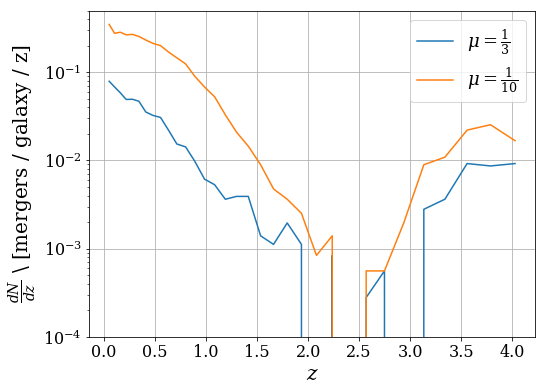

In [5]:
dNdxs_3=merg_rates.dNdx_ofz(tpm2,10.5,np.log10(1./3.),
                            'cengal',dx='dz',
                            ziend=33)
dNdxs_10=merg_rates.dNdx_ofz(tpm2,10.5,np.log10(1./10.),
                             'cengal',dx='dz',
                             ziend=33)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(dNdxs_3[0],dNdxs_3[1],
        label='$\mu=\\frac{1}{3}$')
ax.plot(dNdxs_10[0],dNdxs_10[1],
        label='$\mu=\\frac{1}{10}$')
ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{dN}{dz}$ \ [mergers / galaxy / z]')
ax.set_yscale('log')
ax.set_ylim(1e-4,5e-1)
ax.legend()
plt.show()

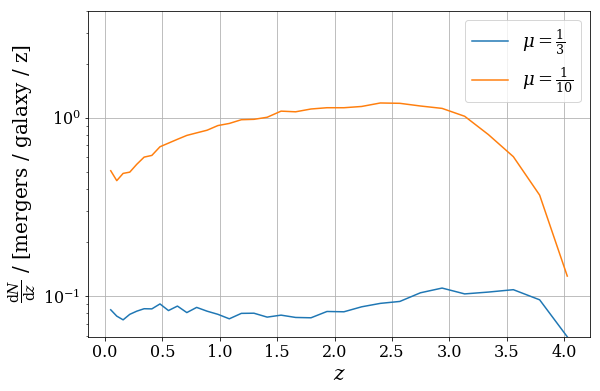

In [34]:
dNdxs_3=merg_rates.dNdx_ofz(tpm2,12.,np.log10(1./3.),
                            'censubhal',dx='dz',
                            ziend=33)
dNdxs_10=merg_rates.dNdx_ofz(tpm2,12.,np.log10(1./10.),
                             'censubhal',dx='dz',
                             ziend=33)

fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111)
ax.plot(dNdxs_3[0],dNdxs_3[1],
        label='$\mu=\\frac{1}{3}$')
ax.plot(dNdxs_10[0],dNdxs_10[1],
        label='$\mu=\\frac{1}{10}$')
ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{\mathrm{d}N}{\mathrm{d}z}$ / [mergers / galaxy / z]')
ax.set_yscale('log')
ax.set_ylim(0,4)
ax.legend()
plt.show()

  read /data1/arwetzel/lcdm250/snapshot.txt
  read  3914367 halo from halo_tree_00.dat
  read  3939586 halo from halo_tree_01.dat
  read  3964156 halo from halo_tree_02.dat
  read  3991148 halo from halo_tree_03.dat
  read  4017802 halo from halo_tree_04.dat
  read  4043082 halo from halo_tree_05.dat
  read  4068695 halo from halo_tree_06.dat
  read  4091273 halo from halo_tree_07.dat
  read  4114245 halo from halo_tree_08.dat
  read  4134906 halo from halo_tree_09.dat
  read  4156401 halo from halo_tree_10.dat
  read  4175240 halo from halo_tree_11.dat
  read  4191460 halo from halo_tree_12.dat
  read  4201253 halo from halo_tree_13.dat
  read  4207986 halo from halo_tree_14.dat
  read  4208029 halo from halo_tree_15.dat
  read  4202839 halo from halo_tree_16.dat
  read  4189843 halo from halo_tree_17.dat
  read  4168435 halo from halo_tree_18.dat
  read  4135114 halo from halo_tree_19.dat
  read  4092177 halo from halo_tree_20.dat
  read  4036281 halo from halo_tree_21.dat
  read  39

building main progenitor tree:


100% |########################################################################|


building merger tree:
1956524 halos in snapshot 34
112654 merge with larger halos
2193677 halos in snapshot 33
129517 merge with larger halos
2425708 halos in snapshot 32
145373 merge with larger halos
2648596 halos in snapshot 31
160448 merge with larger halos
2858599 halos in snapshot 30
176931 merge with larger halos
3053114 halos in snapshot 29
190531 merge with larger halos
3232419 halos in snapshot 28
205766 merge with larger halos
3398624 halos in snapshot 27
217199 merge with larger halos
3545863 halos in snapshot 26
228278 merge with larger halos
3677305 halos in snapshot 25
240581 merge with larger halos
3790788 halos in snapshot 24
250440 merge with larger halos
3886757 halos in snapshot 23
257801 merge with larger halos
3969364 halos in snapshot 22
263542 merge with larger halos
4036281 halos in snapshot 21
271384 merge with larger halos
4092177 halos in snapshot 20
276021 merge with larger halos
4135114 halos in snapshot 19
280332 merge with larger halos
4168435 halos in s

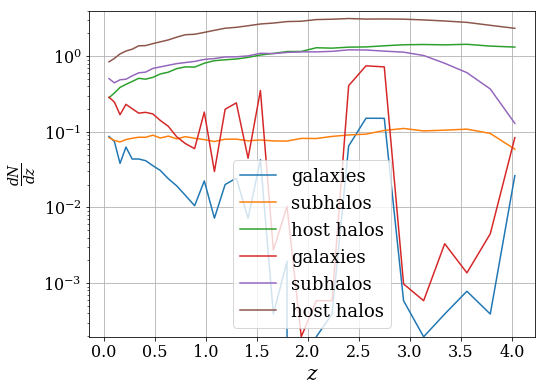

In [8]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

mu=np.log10(1./3.)
zs_gal,dNdzs_gal=merg_rates.dNdx_ofz(tpm2,10.5,mu,
                                     'cengal',dx='dz',ziend=33)
zs_sub,dNdzs_sub=merg_rates.dNdx_ofz(tpm2,12.,mu,
                                     'censubhal',dx='dz',ziend=33)
zs_host,dNdzs_host=merg_rates.dNdx_ofz(tpm2,12.,mu,'host',
                                       dx='dz',ziend=33)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

mu=np.log10(1./10.)
zs_gal,dNdzs_gal=merg_rates.dNdx_ofz(tpm2,10.5,mu,
                                     'cengal',dx='dz',ziend=33)
zs_sub,dNdzs_sub=merg_rates.dNdx_ofz(tpm2,12.,mu,
                                     'censubhal',dx='dz',ziend=33)
zs_host,dNdzs_host=merg_rates.dNdx_ofz(tpm2,12.,mu,'host',
                                       dx='dz',ziend=33)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{dN}{dz}$')
ax.set_yscale('log')
ax.set_ylim(0,4)
ax.legend()
plt.show()

## Making Plots for Outstanding Issues Section of My Appended Thesis

In [23]:
tpm_rand=merg_rates.shamedTreepmClass(0.2,
                                      catkind='subhalo',
                                      source='rand',
                                      shamziend=34,
                                      mmin=3.)
tpm_rand.mp_tree()
tpm_rand.merg_tree()

<module 'merg_rates' from 'merg_rates.py'>

In [16]:
tpm_himin=merg_rates.shamedTreepmClass(0.2,
                                      catkind='subhalo',
                                      source='li-march',
                                      shamziend=33,
                                      mmin=7.)
tpm_himin.mp_tree()
tpm_himin.merg_tree()

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

building main progenitor tree:


100% |########################################################################|


building merger tree:
0 galaxies in snapshot 34
2906961 galaxies in snapshot 33
30 merge with larger galaxies
3267446 galaxies in snapshot 32
88 merge with larger galaxies
3591830 galaxies in snapshot 31
169 merge with larger galaxies
3901457 galaxies in snapshot 30
488 merge with larger galaxies
4187628 galaxies in snapshot 29
553 merge with larger galaxies
4451504 galaxies in snapshot 28
506 merge with larger galaxies
4697199 galaxies in snapshot 27
497 merge with larger galaxies
4914942 galaxies in snapshot 26
407 merge with larger galaxies
5105362 galaxies in snapshot 25
562 merge with larger galaxies
5270374 galaxies in snapshot 24
929 merge with larger galaxies
5409626 galaxies in snapshot 23
1309 merge with larger galaxies
5527314 galaxies in snapshot 22
1787 merge with larger galaxies
5620673 galaxies in snapshot 21
2074 merge with larger galaxies
5697344 galaxies in snapshot 20
2596 merge with larger galaxies
5753867 galaxies in snapshot 19
3350 merge with larger galaxies
5795

In [17]:
dNdxs_3_rand=merg_rates.dNdx_ofz(tpm_rand,10.5,np.log10(1./3.),
                                 'cengal',dx='dz',
                                 ziend=34)
dNdxs_10_rand=merg_rates.dNdx_ofz(tpm_rand,10.5,np.log10(1./10.),
                                  'cengal',dx='dz',
                                  ziend=34)

dNdxs_3_himin=merg_rates.dNdx_ofz(tpm_himin,10.5,np.log10(1./3.),
                                  'cengal',dx='dz',
                                  ziend=33)
dNdxs_10_himin=merg_rates.dNdx_ofz(tpm_himin,10.5,np.log10(1./10.),
                                   'cengal',dx='dz',
                                   ziend=33)

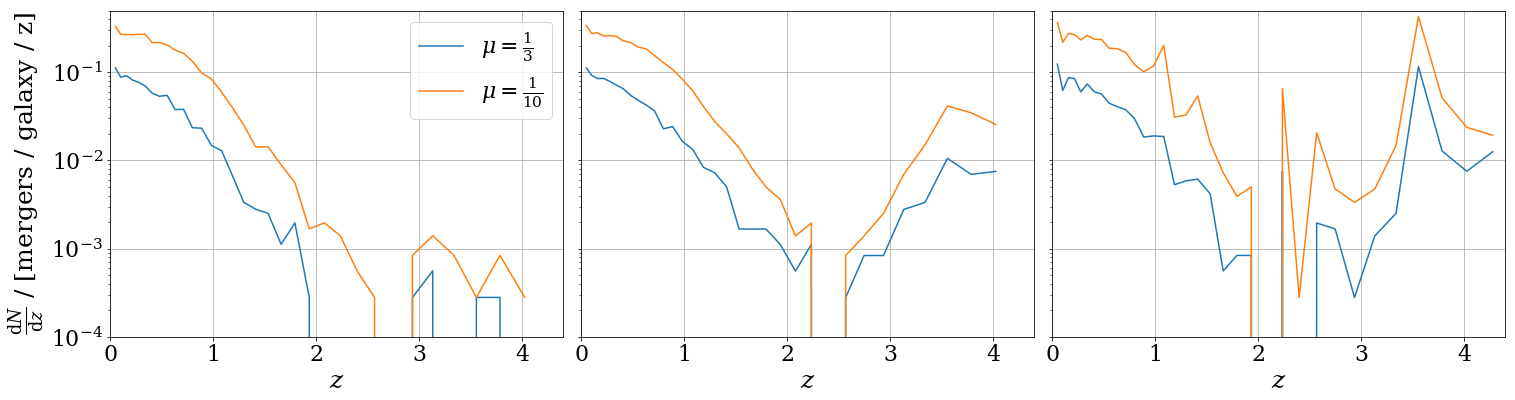

In [28]:
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
rcParams['axes.labelsize']=25
rcParams['legend.fontsize']=22

fig=plt.figure(figsize=(25,6))

ax0=fig.add_subplot(131)
ax0.plot(dNdxs_3[0],dNdxs_3_himin[1],
        label='$\mu>\\frac{1}{3}$')
ax0.plot(dNdxs_10[0],dNdxs_10_himin[1],
        label='$\mu>\\frac{1}{10}$')
ax0.set_xlabel('$z$')
ax0.set_ylabel('$\\frac{\mathrm{d}N}{\mathrm{d}z}$ / [mergers / galaxy / z]')
ax0.set_yscale('log')
ax0.set_ylim(1e-4,5e-1)
ax0.set_xlim(0,4.4)
ax0.legend()

ax1=fig.add_subplot(132)
ax1.plot(dNdxs_3[0],dNdxs_3[1],
        label='$\mu>\\frac{1}{3}$')
ax1.plot(dNdxs_10[0],dNdxs_10[1],
        label='$\mu>\\frac{1}{10}$')
ax1.set_xlabel('$z$')
ax1.set_yscale('log')
ax1.set_ylim(1e-4,5e-1)
ax1.set_xlim(0,4.4)

ax2=fig.add_subplot(133)
ax2.plot(dNdxs_3_rand[0],dNdxs_3_rand[1],
        label='$\mu>\\frac{1}{3}$')
ax2.plot(dNdxs_10_rand[0],dNdxs_10_rand[1],
        label='$\mu>\\frac{1}{10}$')
ax2.set_xlabel('$z$')
ax2.set_yscale('log')
ax2.set_ylim(1e-4,5e-1)
ax2.set_xlim(0,4.4)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
fig.subplots_adjust(wspace=0.04)

plt.show()

# $\frac{dN}{dz}(\mu)$

In [24]:
ziend=1
force=True
thru=False
typ='censubhal'

mus_12,dNdzs_12=merg_rates.dNdx_ofmu(tpm2,12.,typ,'z',
                                     forcem200=force,through=thru,ziend=ziend)
mus_11,dNdzs_11=merg_rates.dNdx_ofmu(tpm2,11.,typ,'z',
                                     forcem200=force,through=thru,ziend=ziend)
mus_13,dNdzs_13=merg_rates.dNdx_ofmu(tpm2,13.,typ,'z',
                                     forcem200=force,through=thru,ziend=ziend)


running N(>mu)

running N(>mu)

running N(>mu)


In [6]:
anguloms,anguloN=np.loadtxt('dat/true_angulo.csv',delimiter=',',
                            unpack=True)
wetzelloms,wetzelloN=np.loadtxt('dat/true_wetzello.csv',delimiter=',',
                                unpack=True)
wetzelhims,wetzelhiN=np.loadtxt('dat/true_wetzelhi.csv',delimiter=',',
                                unpack=True)

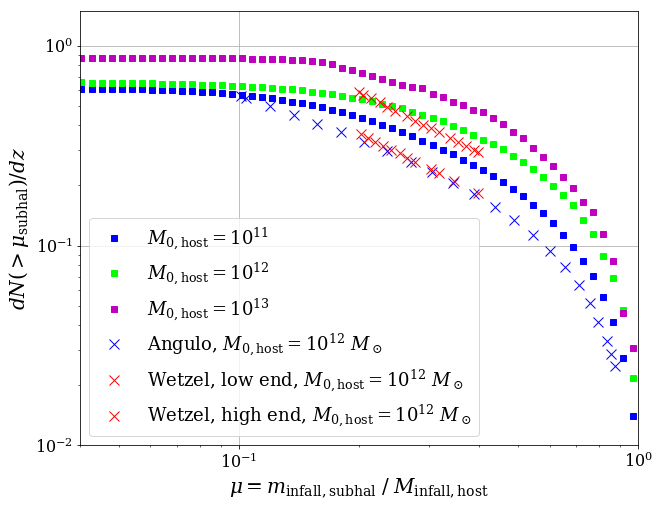

In [25]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
dNdz_mu_ax(ax,
           mus_11,dNdzs_11,
           mus_12,dNdzs_12,
           mus_13,dNdzs_13,ms=6,
           xlab='$\mu=m_\mathrm{infall,subhal}\;/\;M_\mathrm{infall,host}$')
ax.legend()
plt.show()

### Comp Plot

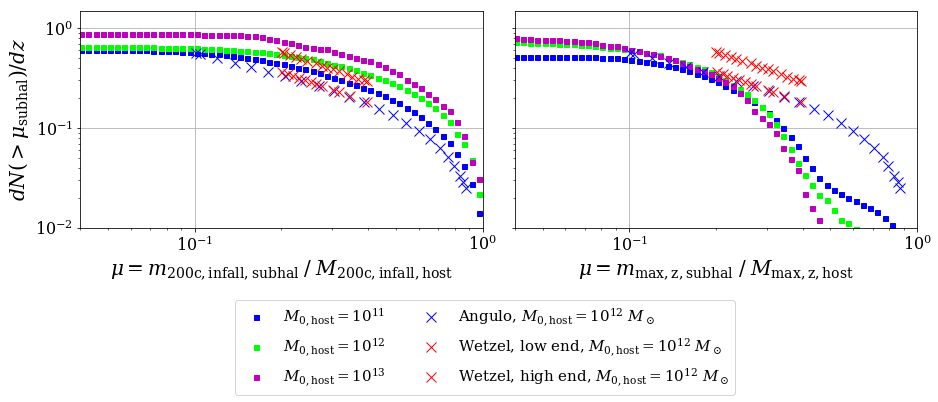

In [142]:
'''
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
rcParams['axes.labelsize']=28
'''
rcParams['legend.fontsize']=15


ms=5

fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(121)
dNdz_mu_ax(ax1,
           mus_11,dNdzs_11,
           mus_12,dNdzs_12,
           mus_13,dNdzs_13,
           '$\mu=m_\mathrm{200c,infall,subhal}\;/\;M_\mathrm{200c,infall,host}$',ms=ms)
ax2=fig.add_subplot(122)
dNdz_mu_ax(ax2,
           mus_11_nf,dNdzs_11_nf,
           mus_12_nf,dNdzs_12_nf,
           mus_13_nf,dNdzs_13_nf,
           '$\mu=m_\mathrm{max,z,subhal}\;/\;M_\mathrm{max,z,host}$',
           showylab=False,ms=ms)
ax1.legend(bbox_to_anchor=(0.5,-.48),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2)
plt.setp(ax2.get_yticklabels(), visible=False)
fig.subplots_adjust(wspace=0.08)
plt.show()

# Testing new $N(>\mu)$ code

In [8]:
midbins_s_12,N_gmratio_s_12=np.loadtxt('dat/stewart12m_M0.csv',         
                                       delimiter=',',                   
                                       unpack=True)                     
midbins_s_13,N_gmratio_s_13=np.loadtxt('dat/stewart13m_M0.csv',         
                                       delimiter=',',                   
                                       unpack=True)                      


running N(>mu)

running N(>mu)

running N(>mu)

running N(>mu)

running N(>mu)


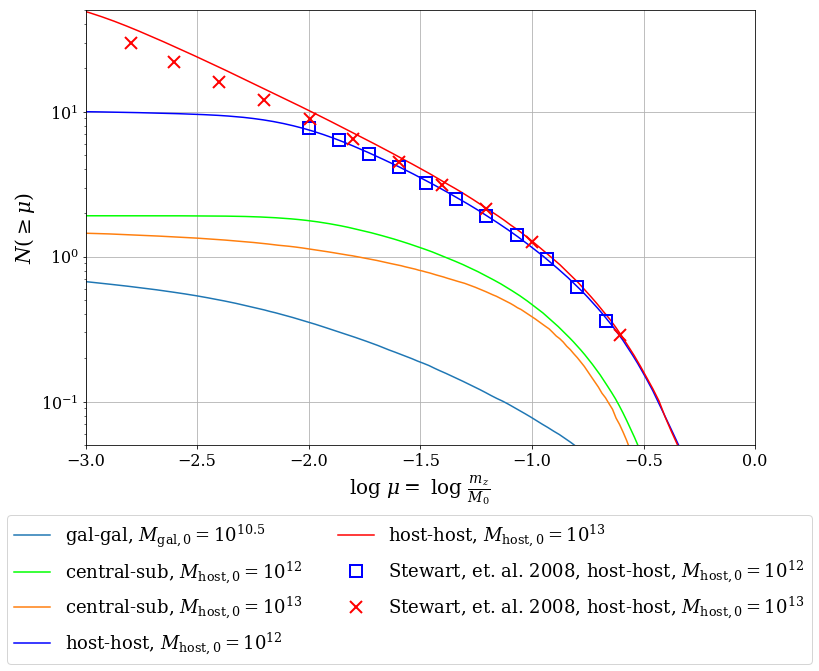

In [22]:
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['axes.labelsize']=25
rcParams['legend.fontsize']=21

fig=plt.figure(figsize=(12,7))                                           
ax=fig.add_subplot(111)                                                 

musgal,Nsgal=merg_rates.N_mu_ft(tpm2,10.5,'cengal',ziend=33,Mtime='0',
                                forcem200=False)
mussub12,Nssub12=merg_rates.N_mu_ft(tpm2,12.,'censubhal',ziend=33,
                                    Mtime='0',
                                    forcem200=True)
mussub13,Nssub13=merg_rates.N_mu_ft(tpm2,13.,'censubhal',ziend=33,
                                    Mtime='0',
                                    forcem200=True)
mushost12,Nshost12=merg_rates.N_mu_ft(tpm2,12.,'host',ziend=33,Mtime='0')
mushost13,Nshost13=merg_rates.N_mu_ft(tpm2,13.,'host',ziend=33,Mtime='0')

gcol=(0.,255./255.,0./255.)
ax.plot(musgal,Nsgal,label='gal-gal, $M_\mathrm{gal,0}=10^{10.5}$')
ax.plot(mussub12,Nssub12,
        label='central-sub, $M_\mathrm{host,0}=10^{12}$',
        color=gcol)
ax.plot(mussub13,Nssub13,
        label='central-sub, $M_\mathrm{host,0}=10^{13}$')
ax.plot(mushost12,Nshost12,
        label='host-host, $M_\mathrm{host,0}=10^{12}$',
        color='b')
ax.plot(mushost13,Nshost13,
        label='host-host, $M_\mathrm{host,0}=10^{13}$',
        color='r')
ax.plot(np.log10(midbins_s_12),N_gmratio_s_12,'s',mec='b',              
        mfc='None',                                                     
        ms=12,mew=2,label='Stewart, et. al. 2008, host-host, '
                          '$M_\mathrm{host,0}=10^{12}$')                                                 
ax.plot(np.log10(midbins_s_13),N_gmratio_s_13,'x',mec='r',              
        mfc='None',                                                     
        ms=12,mew=2,label='Stewart, et. al. 2008, host-host, '
                          '$M_\mathrm{host,0}=10^{13}$')                                                 


ax.set_xlim(-3,0)                                                       
ax.set_ylim(1e-2,5e1)                                                   
ax.set_yscale('log')       
ax.set_xlabel('log $\mu=$ log $\\frac{m_z}{M_0}$')
#ax.set_title('Number of mergers where $\\frac{m_z}{M_0}\geq\mu$')
ax.set_ylabel('$N(\geq\mu)$')
ax.legend(bbox_to_anchor=(0.93,0.5),
          bbox_transform=fig.transFigure,
          loc="center left",ncol=1)
plt.show()


running N(>mu)

running N(>mu)

running N(>mu)


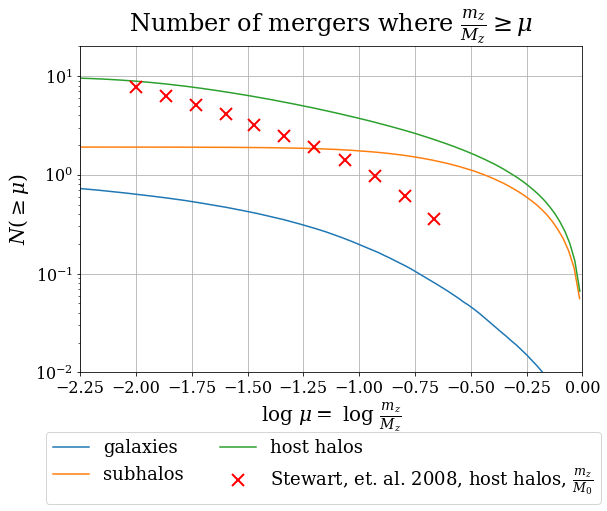

In [21]:
fig=plt.figure(figsize=(9,6))                                           
ax=fig.add_subplot(111)                                                 

musgal,Nsgal=merg_rates.N_mu_ft(tpm2,10.5,'cengal',ziend=33,Mtime='z')
mussub,Nssub=merg_rates.N_mu_ft(tpm2,12.,'censubhal',ziend=33,
                                Mtime='z',forcem200=True)
mushost,Nshost=merg_rates.N_mu_ft(tpm2,12.,'host',ziend=33,Mtime='z')

ax.plot(musgal,Nsgal,label='galaxies')
ax.plot(mussub,Nssub,label='subhalos')
ax.plot(mushost,Nshost,label='host halos')

ax.plot(np.log10(midbins_s_12),N_gmratio_s_12,'x',mec='r',              
        mfc='None',                                                     
        ms=12,mew=2,label='Stewart, et. al. 2008, host halos, '\
                          '$\\frac{m_z}{M_0}$')                                                 

ax.set_xlim(-2.25,0)                                                       
ax.set_ylim(1e-2,2e1)                                                   
ax.set_yscale('log')       
ax.set_xlabel('log $\mu=$ log $\\frac{m_z}{M_z}$')
ax.set_title('Number of mergers where $\\frac{m_z}{M_z}\geq\mu$')
ax.set_ylabel('$N(\geq\mu)$')
ax.legend(bbox_to_anchor=(0.5,-.2),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2)
plt.show()


running N(>mu)


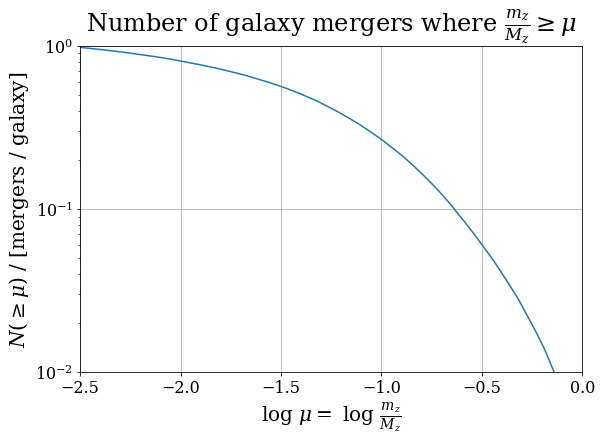

<Figure size 432x288 with 0 Axes>

In [16]:
fig=plt.figure(figsize=(9,6))                                           
ax=fig.add_subplot(111)                                                 

musgal,Nsgal=merg_rates.N_mu_ft(tpm2,10.5,'cengal',ziend=33,
                                Mtime='z')                                 
ax.plot(musgal,Nsgal)
ax.set_xlim(-2.5,0)                                                       
ax.set_ylim(1e-2,1)                                                   
ax.set_yscale('log')       
ax.set_xlabel('log $\mu=$ log $\\frac{m_z}{M_z}$')
ax.set_title('Number of galaxy mergers where $\\frac{m_z}{M_z}\geq\mu$')
ax.set_ylabel('$N(\geq\mu)$ / [mergers / galaxy]')
#ax.legend(bbox_to_anchor=(0.5,-.2),
#          bbox_transform=fig.transFigure,
#          loc="lower center",ncol=2)
plt.show()  